In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from keras.models import Sequential, load_model
from keras.layers import Dense, Activation
from sklearn.externals import joblib

% matplotlib inline

In [2]:
# Load data
train_df = pd.read_csv("~/real_estate/data/train_df_smote.csv")
test_df = pd.read_csv("~/real_estate/data/supervised_dfs/test_df_pca.csv")

# Split daga
features = train_df.columns[:-1]

X_train = train_df[features].values
X_test = test_df[features].values
y_train = train_df["target"].values
y_test = test_df["target"].values

In [3]:
# compile DNN
# model = Sequential()
# model.add(Dense(units=10, activation='sigmoid', input_dim=20))
# model.add(Dense(units=5, activation='sigmoid'))
# model.add(Dense(units=1, activation='sigmoid'))
# model.compile(loss='mean_squared_error', optimizer='sgd')

# Run DNN
# model.fit(X_train, y_train, epochs=5, batch_size=1)

Epoch 1/5
523996/523996 [==============================] - 553s 1ms/step - loss: 0.0281
Epoch 2/5
523996/523996 [==============================] - 554s 1ms/step - loss: 0.0241
Epoch 3/5
523996/523996 [==============================] - 559s 1ms/step - loss: 0.0226
Epoch 4/5
523996/523996 [==============================] - 568s 1ms/step - loss: 0.0207
Epoch 5/5
523996/523996 [==============================] - 566s 1ms/step - loss: 0.0190


In [10]:
# Save model
# model.save_weights('/home/gnazareths/real_estate/data/supervised_dfs/dnn_weights.h5')

# Load model
model = Sequential()
model.add(Dense(units=10, activation='sigmoid', input_dim=20))
model.add(Dense(units=5, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='sgd')
model.load_weights('/home/gnazareths/real_estate/data/supervised_dfs/dnn_weights.h5')

In [15]:
# Get predictions and errors
y_train_hat = model.predict(X_train).reshape(1, -1)
y_test_hat = model.predict(X_test).reshape(1, -1)

errors_train = abs(y_train_hat - y_train)
errors_test = abs(y_test_hat - y_test)

print("Mean test error: ", np.mean(errors_test))
print("Mean test value: ", np.mean(y_test))
print("R^2 test: ", np.square(np.corrcoef(y_test, y_test_hat)[0,1]))
print('---')
print("Mean train error: ", np.mean(errors_train))
print("Mean train value: ", np.mean(y_train))
print("R^2 train: ", np.square(np.corrcoef(y_train, y_train_hat)[0,1]))

Mean test error:  0.05201471788229916
Mean test value:  0.011548391038586212
R^2 test:  0.0667528382312704
---
Mean train error:  0.10764118668458063
Mean train value:  0.10820680521390952
R^2 train:  0.5703617262357267


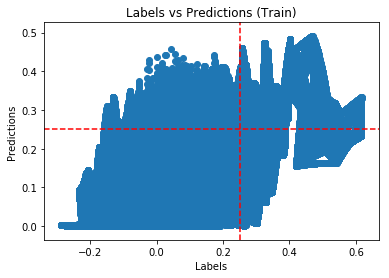

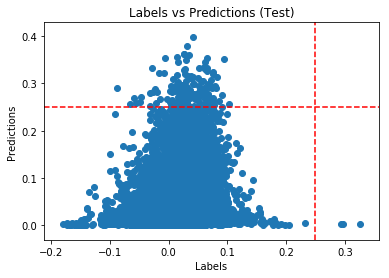

In [16]:
plt.scatter(y_train, y_train_hat)
plt.title("Labels vs Predictions (Train)")
plt.ylabel("Predictions")
plt.xlabel("Labels")
plt.axvline(x=0.25, color="red", linestyle='--')
plt.axhline(y=0.25, color="r", linestyle='--')
plt.show()

plt.scatter(y_test, y_test_hat)
plt.title("Labels vs Predictions (Test)")
plt.ylabel("Predictions")
plt.xlabel("Labels")
plt.axvline(x=0.25, color="red", linestyle='--')
plt.axhline(y=0.25, color="r", linestyle='--')
plt.show()